In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

def read_data(Xpath="data/q4/q4x.dat",Ypath="data/q4/q4y.dat"):
    X = np.array(pd.read_csv(Xpath,header=None,delim_whitespace=True).values)
    Y = np.array(pd.read_csv(Ypath,header=None,delim_whitespace=True).values)
    X = normalize(X)
    print(np.mean(X,axis=0))
    print(np.var(X,axis=0))
    return X,Y
def normalize(X):
    mean=np.mean(X,axis=0)
    X=(X-mean)/np.var(X,axis=0)**0.5
    return X

In [3]:
X,Y=read_data()

[-5.55111512e-17  2.99760217e-16]
[1. 1.]


In [4]:
# Implement Gaussian Discriminant Analysis
def gda(X,Y):
    X_mean=np.mean(X,axis=0)
    X_std=np.std(X,axis=0)
    X_norm=(X-X_mean)/X_std
    X_norm=np.hstack((np.ones((X_norm.shape[0],1)),X_norm))
    Y_mean=np.mean(Y)
    Y_std=np.std(Y)
    Y_norm=(Y-Y_mean)/Y_std
    Y_norm=np.hstack((np.ones((Y_norm.shape[0],1)),Y_norm))
    W=np.dot(np.dot(np.linalg.inv(np.dot(X_norm.T,X_norm)),X_norm.T),Y_norm)
    return W

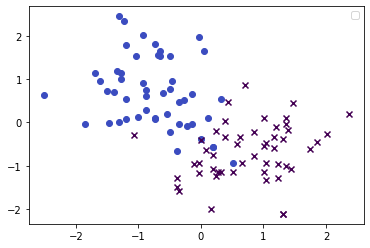

In [5]:
# plot training data
Y_pred=np.where(Y=="Canada",1,0)
plt.legend(["Canada","Alaksa"])
for i in range(Y_pred.shape[0]):
    if Y_pred[i]==1:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="x",label="Canada",)
    else:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="o",label="Alaska",cmap=cm.coolwarm)
# plt.scatter(X[:,0],X[:,1],c=Y_pred,marker="x")
# plt.scatter(X[:,0],X[:,1],c=Y_pred,marker="+")
# plt.scatter(X[Y_pred==0, 0], X[Y_pred==0, 1], marker='o')
# plt.scatter(X[Y_pred==1, 0], X[Y_pred==1, 1], marker='+')



In [6]:

def gda(X,Y):
    m=X.shape[0]
    psi=np.mean(np.where(Y=="Alaska",0,1))
    class0=(Y=="Alaska").flatten()
    class1=(Y=="Canada").flatten()
    mu_0=np.mean(X[class0,:],axis=0)
    mu_1=np.mean(X[class1,:],axis=0)
    temp0=X[class0,:]-mu_0
    temp1=X[class1,:]-mu_1
    sigma_0=np.dot(temp0.T,temp0)/len(temp0)
    sigma_1=np.dot(temp1.T,temp1)/len(temp1)
    sigma=(len(temp0)*sigma_0+len(temp1)*sigma_1)/m
    return psi,mu_0,mu_1,sigma_0,sigma_1,sigma
# print(X)
psi,mu_0,mu_1,sigma_0,sigma_1,sigma=gda(X,Y)
print(psi,mu_0,mu_1,sigma)
print(sigma_0,sigma_1)

0.5 [-0.75529433  0.68509431] [ 0.75529433 -0.68509431] [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]] [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [7]:
ans=0
l0=0
l1=0
r1=0
r0=0
for i in range(X.shape[0]):
    if(Y[i][0]=="Alaska"):
        ans+=1
        l0+=X[i][0]
        r0+=X[i][1]
    else:
        l1+=X[i][0]
        r1+=X[i][1]
print(l0,r0,l1,r1)
print(l0+r0+l1+r1)
print(l0/50,r0/50,l1/50,r1/50)


-37.764716399568044 34.2547152774464 37.76471639956804 -34.254715277446365
2.842170943040401e-14
-0.7552943279913609 0.685094305548928 0.7552943279913608 -0.6850943055489274


1.7763568394002505e-15 [ 6.77850904 -4.87716799]


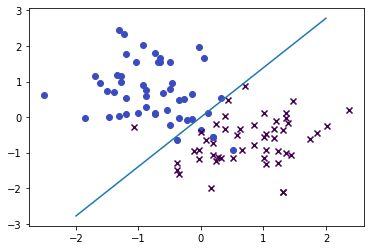

In [37]:
const_term = np.dot(np.dot(mu_0.transpose(),np.linalg.pinv(sigma)),mu_0) - np.dot(np.dot(mu_1.transpose(),np.linalg.pinv(sigma)),mu_1)
x_coeff = 2*np.dot((mu_1.transpose()-mu_0.transpose()),np.linalg.pinv(sigma))
x1 = np.linspace(-2,2,2)
print(const_term,x_coeff)
x2 = -1*(const_term+x_coeff[0]*x1)/x_coeff[1]
plt.plot(x1,x2,label='Linear Hypothesis')
for i in range(Y_pred.shape[0]):
    if Y_pred[i]==1:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="x",label="Canada",)
    else:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="o",label="Alaska",cmap=cm.coolwarm)
# x, y = np.random.multivariate_normal(mu_0, sigma, 500).T
# plt.plot(x, y, 'x')
# x, y = np.random.multivariate_normal(mu_1, sigma, 500).T
# plt.plot(x, y, 'o')
def plot_quadratic(mu_0, mu_1, sigma_0,sigma_1):
    C1=np.log(((1-psi)*np.linalg.det(sigma_1)**0.5)/(psi*np.linalg.det(sigma_0)**0.5))
    C2=0.5*(np.dot(np.dot(mu_1.transpose(),np.linalg.pinv(sigma_1)),mu_1)-np.dot(np.dot(mu_0.transpose(),np.linalg.pinv(sigma_0)),mu_0))
    A=0.5*(np.linalg.pinv(sigma_1)-np.linalg.pinv(sigma_0))
    B=-1*(np.dot(mu_1.transpose(),np.linalg.pinv(sigma_1))-np.dot(mu_0.transpose(),np.linalg.pinv(sigma_0)))
    a=A[0][0]+A[0][1]
    b=A[1][0]+A[1][1]
    c=A[0][0]+A[0][1]+A[1][0]+A[1][1]
    d=B[0]
    e=B[1]
    f=C1+C2
    x1=np.linspace(-3,3,200)
    x2=np.linspace(-3,3,200)
    x1,x2=np.meshgrid(x1,x2)
    return plt.contour(x1,x2,(a*x1**2+b*x2**2+c*x1*x2+d*x1+e*x2+f),[0])

1.7763568394002505e-15 [ 6.77850904 -4.87716799]


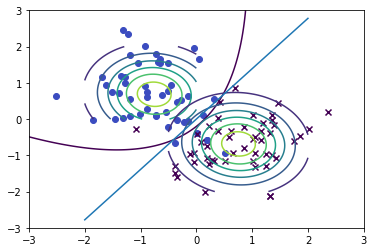

In [38]:

for i in range(Y_pred.shape[0]):
    if Y_pred[i]==1:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="x",label="Canada",)
    else:
        plt.scatter(X[i,0],X[i,1],c=Y_pred[i],marker="o",label="Alaska",cmap=cm.coolwarm)
const_term = np.dot(np.dot(mu_0.transpose(),np.linalg.pinv(sigma)),mu_0) - np.dot(np.dot(mu_1.transpose(),np.linalg.pinv(sigma)),mu_1)
x_coeff = 2*np.dot((mu_1.transpose()-mu_0.transpose()),np.linalg.pinv(sigma))
x1 = np.linspace(-2,2,2)
print(const_term,x_coeff)
x2 = -1*(const_term+x_coeff[0]*x1)/x_coeff[1]
plt.plot(x1,x2,label='Linear Hypothesis')
plot_quadratic(mu_0, mu_1, sigma_0,sigma_1)
N = 60


# Mean vector and covariance matrix

# Pack X and Y into a single 3-dimensional array


def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Xtt = np.linspace(-2,0 , N)
Ytt = np.linspace(0, 2, N)
Xtt, Ytt = np.meshgrid(Xtt, Ytt)
pos = np.empty(Xtt.shape + (2,))
pos[:, :, 0] = Xtt
pos[:, :, 1] = Ytt
Z = multivariate_gaussian(pos, mu_0, sigma)
cset = plt.contour(Xtt, Ytt, Z)

Xtt = np.linspace(-0.5,2 , N)
Ytt = np.linspace(-2, 1, N)
Xtt, Ytt = np.meshgrid(Xtt, Ytt)
pos = np.empty(Xtt.shape + (2,))
pos[:, :, 0] = Xtt
pos[:, :, 1] = Ytt

Z = multivariate_gaussian(pos, mu_1, sigma)
cset = plt.contour(Xtt, Ytt, Z)


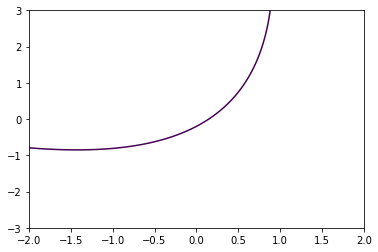

In [34]:
plot_quadratic(mu_0, mu_1, sigma_0,sigma_1)

In [11]:

const_term = 0.5*np.dot(np.dot(mu_1.transpose(),np.linalg.pinv(sigma_1)),mu_1) - np.dot(np.dot(mu_0.transpose(),np.linalg.pinv(sigma_0)),mu_0)
# Coefficient for the x term
x_coeff = -(np.dot(mu_1.transpose(),np.linalg.pinv(sigma_1))-np.dot(mu_0.transpose(),np.linalg.pinv(sigma_0)))
# Coefficient for the np.dot(x,x.transpose()) term
x_2coeff =0.5* np.linalg.pinv(sigma_1) - np.linalg.pinv(sigma_0)
# Generating the data-points for the curve
print("f")
print(const_term,x_coeff,x_2coeff)
print("f")


size = 50
x1 = np.linspace(-2,2,size)
# plot quadratic curve
x2 = (const_term+C+x_coeff[0]*x1+x_2coeff[0,0]*x1**2)/x_coeff[1]
plt.plot(x1,x2,label='Quadratic Hypothesis')


# threshold to qualify for lying on curve
threshold = 0.06
# class_fin contains the data-points which will be used for plotting
class_fin = []

y = np.asmatrix(np.zeros((size,size),dtype=float))
x1 = np.linspace(-1.4,-0.6,size)
x2 = np.linspace(-0.1,2,size)
x,y = np.meshgrid(x1,x2)
# find parameters for the quadratic curve
a=

z=
plt.contour(x,y,)

SyntaxError: invalid syntax (<ipython-input-11-5e3a540f6621>, line 29)

In [ ]:
print(class_fin)
